<a href="https://colab.research.google.com/github/popkaotarbuza/sleep-disorder-diagnosis/blob/dev/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
github_csv_url = 'https://raw.githubusercontent.com/popkaotarbuza/sleep-disorder-diagnosis/refs/heads/dev/src/data/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(github_csv_url)
df.head(375)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [54]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

median_values = numeric_df.median()
mean_values = numeric_df.mean()

print("Типы данных\n")
print(df.dtypes)
print("\n")

print("Медиана\n")
print(median_values)
print("\n")

print("Среднее\n")
print(mean_values)

Типы данных

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


Медиана

Person ID                   187.5
Age                          43.0
Sleep Duration                7.2
Quality of Sleep              7.0
Physical Activity Level      60.0
Stress Level                  5.0
Heart Rate                   70.0
Daily Steps                7000.0
dtype: float64


Среднее

Person ID                   187.500000
Age                          42.184492
Sleep Duration                7.132086
Quality of Sleep              7.312834
Physical Activity Level      59.171123
Stress Level  

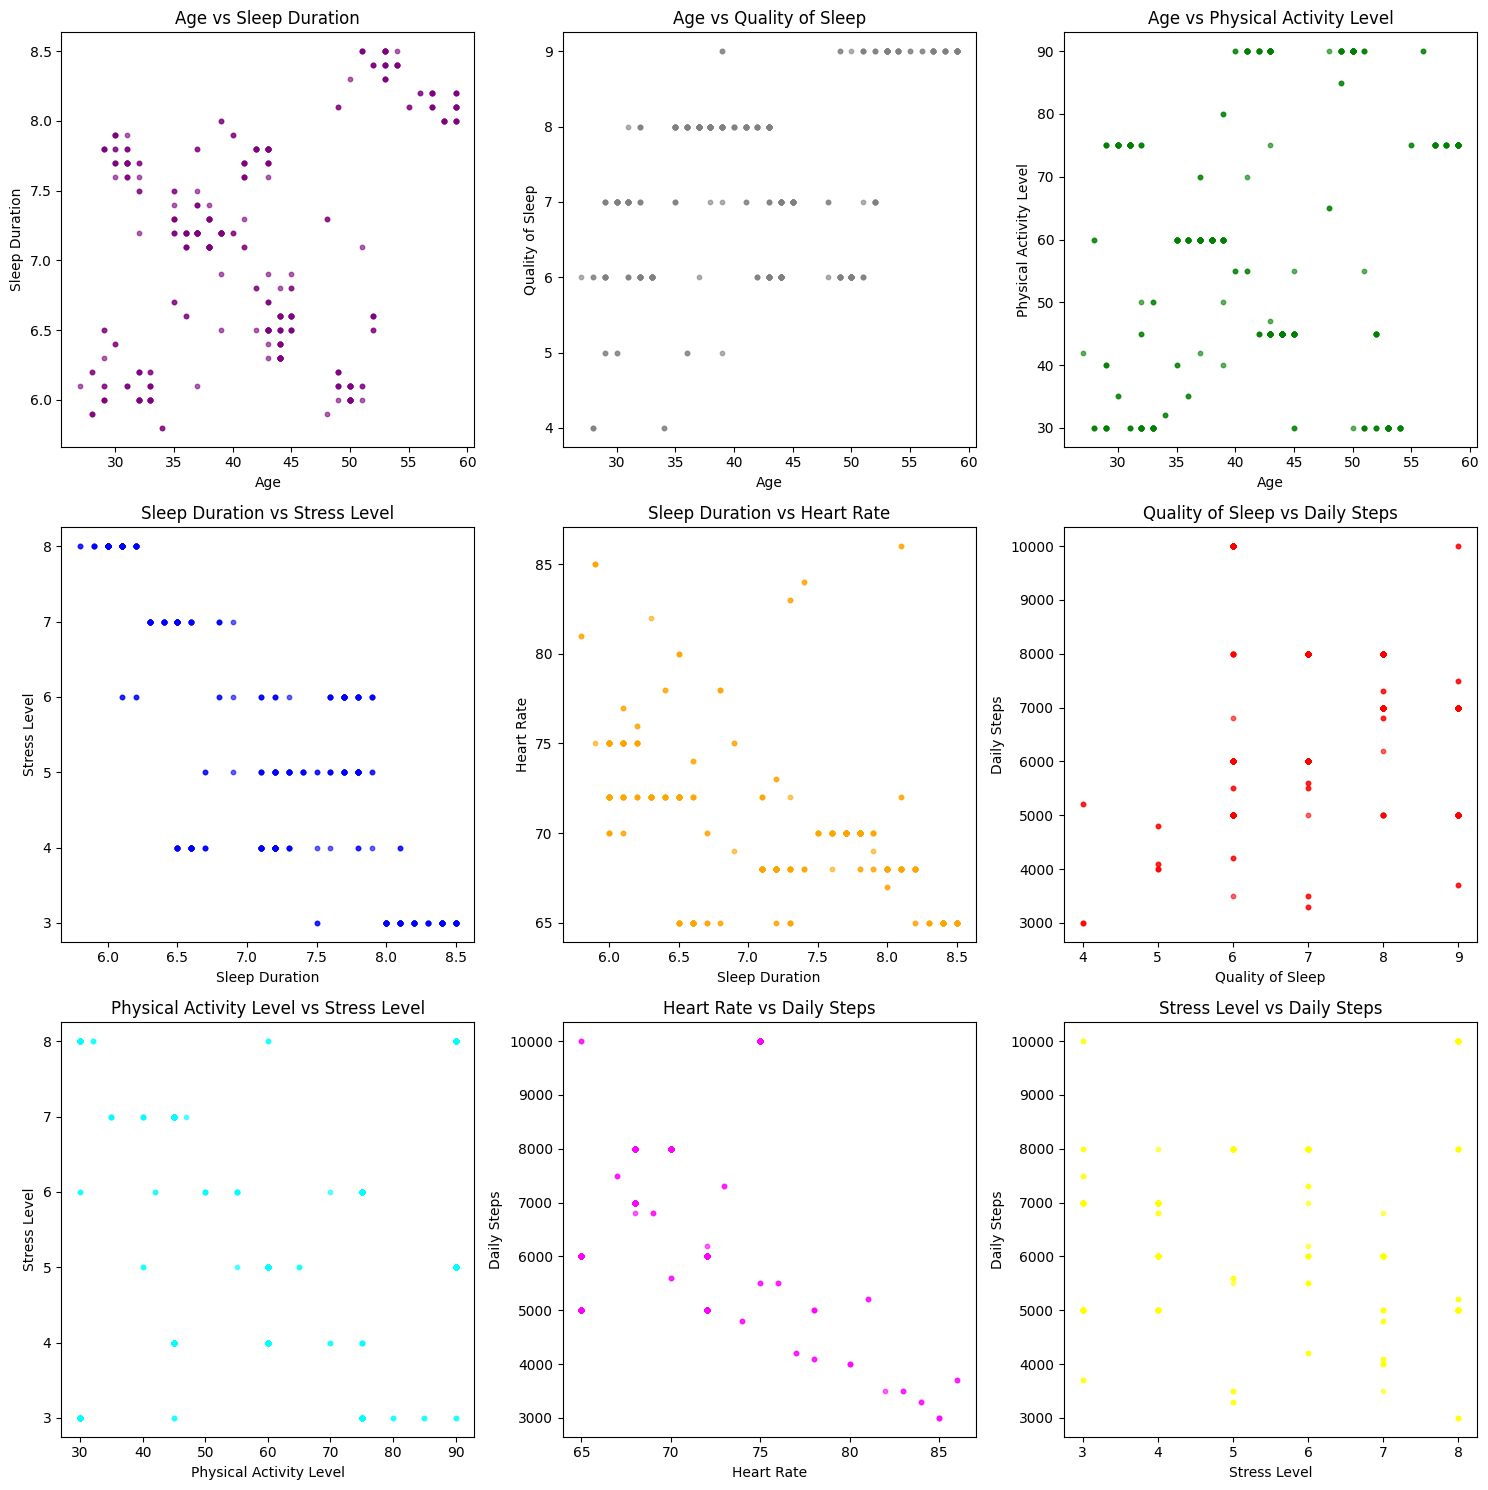

In [35]:
# Выбор числовых столбцов для анализа
numeric_cols = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level",
                "Stress Level", "Heart Rate", "Daily Steps"]

# Создание фигуры с сеткой 3x3 (для 9 графиков, оставшиеся можно убрать)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Список пар для scatter plots (все возможные комбинации)
pairs = [
    ("Age", "Sleep Duration"),
    ("Age", "Quality of Sleep"),
    ("Age", "Physical Activity Level"),
    ("Sleep Duration", "Stress Level"),
    ("Sleep Duration", "Heart Rate"),
    ("Quality of Sleep", "Daily Steps"),
    ("Physical Activity Level", "Stress Level"),
    ("Heart Rate", "Daily Steps"),
    ("Stress Level", "Daily Steps")
]

# Построение scatter plots
colors = ['purple', 'gray', 'green', 'blue', 'orange', 'red', 'cyan', 'magenta', 'yellow']
for i, (x_col, y_col) in enumerate(pairs):
    if i < len(axes):
        axes[i].scatter(df[x_col], df[y_col], color=colors[i % len(colors)], alpha=0.6, s=10)
        axes[i].set_title(f"{x_col} vs {y_col}")
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)

# Настройка макета
plt.tight_layout()
plt.show()

In [18]:
# Позволяет оценить качество данных и  понять, сколько пропущенных значений присутствует в наборе, где они возникают и как возникновение пропущенных значений связано между столбцами
miss_rate = df.isnull().mean().sort_values(ascending=False)
miss_rate

,0
Sleep Disorder,0.585561
Gender,0.000000
Age,0.000000
Occupation,0.000000
Person ID,0.000000
Sleep Duration,0.000000
Quality of Sleep,0.000000
Stress Level,0.000000
Physical Activity Level,0.000000
BMI Category,0.000000
